<a href="https://colab.research.google.com/github/Nikhil1O1/interns_task/blob/main/Genius_Intern_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Genius AI - Intern Task by <b>Nikhil Choudhary</b></h2>


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1.  <a href="#item11">Performing EDA and Building features for the objective</a>
2.  <a href="#item12">Training XGB</a>  
3.  <a href="#item13">Training RFR</a>  
4.  <a href="#item14">Training DNN</a>  
5.  <a href="#item15">Using SHAP to explain</a>
6.  <a href="#item16">Conclusion</a>


</font>
    
</div>

##Performing EDA and Building features for the objective
<a id='item11'></a>

In [1]:
import pandas as pd
from pandas import DataFrame as DF
import seaborn as sbn
from sklearn.utils import resample  #for balancing data

In [2]:
#importing dataset
df = pd.read_csv (r'taskdata.csv')
print (df)

          user_id  account_id  ...  avg_sms_replies  target
0          410039       496.0  ...         0.250000       0
1          410240       499.0  ...         0.000000       0
2          411764       493.0  ...         0.000000       0
3          411985       262.0  ...         0.000000       1
4          412071       496.0  ...         0.230769       0
...           ...         ...  ...              ...     ...
4402  73498690100       113.0  ...         0.333333       0
4403  73519239100      1017.0  ...         0.000000       0
4404  73525763100       226.0  ...         0.000000       0
4405  73538605100       226.0  ...         0.000000       0
4406  73560305100      1017.0  ...         0.000000       0

[4407 rows x 17 columns]


In [3]:
df.sample(5)

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
2822,7218500967,517.0,2,1.142857,7,0.0,0.0,5.285714,102.857143,0,0.0,57.285714,8.857143,11.857143,20.142857,0.142857,0
1719,644362646,496.0,1,1.000000,11,0.0,0.0,2.000000,60.000000,4,0.0,35.818182,5.727273,10.727273,9.454545,0.000000,0
894,610065333,113.0,3,1.142857,14,0.0,0.0,3.000000,80.833333,0,150.0,12.000000,1.916667,4.166667,5.833333,0.000000,0
1981,653509046,499.0,3,1.153846,13,0.0,0.0,5.916667,130.000000,0,0.0,69.500000,7.333333,6.916667,7.000000,0.000000,0
1707,643538632,1005.0,200,30.375000,8,0.0,0.0,3.000000,50.000000,0,280.0,117.166667,8.166667,6.333333,6.500000,0.000000,0


In [4]:
df.dropna()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.00,0.00,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.00,0.00,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.00,0.00,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.00,0.00,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.00,0.00,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,73498690100,113.0,1,1.000000,4,0.00,0.00,0.000000,0.000000,3,0.0,4.666667,2.000000,9.666667,14.666667,0.333333,0
4403,73519239100,1017.0,1,1.000000,2,0.00,0.00,0.000000,0.000000,4,0.0,153.000000,76.500000,9.000000,11.500000,0.000000,0
4404,73525763100,226.0,1,1.000000,2,0.00,0.00,0.000000,0.000000,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
4405,73538605100,226.0,1,1.000000,2,551.19,551.19,7.000000,70.000000,1,0.0,17.000000,17.000000,10.000000,8.000000,0.000000,0


In [5]:
#presence of user_id and account_id doesn't help in taking any decision, hence
#discarding it
df.drop(['user_id', 'account_id'],axis=1,inplace = True)
df.head()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [6]:
df.nunique(axis=0)

max_return_days           229
average_return_days       917
customer_since_months      23
total_revenue             434
average_revenue           510
avg_vas_count             677
avg_used_vas_value       1027
business_type               6
avg_wallet_bonus          989
avg_active_ads           2757
avg_new_ads              1422
avg_email_replies        1900
avg_call_replies         1932
avg_sms_replies           140
target                      2
dtype: int64

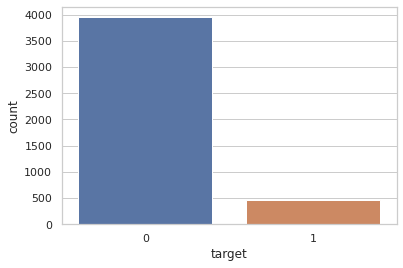

In [7]:
#It apppears Target variable has only 2 types of values, Let's examine them

sbn.set_theme(style="whitegrid")
ax = sbn.countplot(x="target", data=df)

#data is higly imbalanced
#If we train it this way, we might get high accuracy but our model
#might not work well in a practical scenario
#hence we will use over and under sampling to have a better balance

In [8]:
#but first we seperate our test set in 3/4 ration
#NOTE- UNLIKE RANDOM TRAIN TEST SPLIT RANDOM SEED GENERATOR, 
#THIS METHOD SEGREGATES DATA RANDOMLY, I.E IT IS LIKELY THAT ON WHEN YOU RUN THIS ON YOUR NOTEBOOK, 
#THE ACCUACY AND GRAPHS DISPLAYEDMAY NOT MATCH THE DESCRIPTION!!!

train = df.sample(frac = 0.75)
test = df.drop(train.index)

#Here we are seperating our test data, this data won't go under any preprocessing
#hence simulating real world raw data for our evaluation

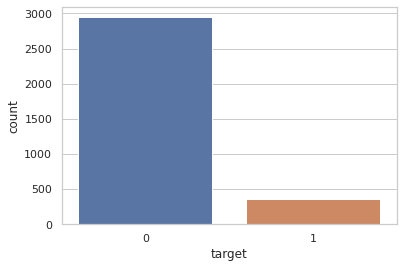

In [9]:
ax = sbn.countplot(x="target", data=train)
#our train data is higly imbalanced as seen before

In [10]:
df_majority = train[train.target==0]   #specifying majority and minority
df_minority = train[train.target==1]
train.target.value_counts()

0    2946
1     359
Name: target, dtype: int64

In [11]:
df_minority_upsampled = resample(df_minority, replace=True,n_samples=2000,random_state=500)
#increasing the amount of minority 

In [12]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
#concatinating it with our majority data

In [13]:
df_upsampled.target.value_counts()
#the ratio of Majority and minority appears to be acceptable

0    2946
1    2000
Name: target, dtype: int64

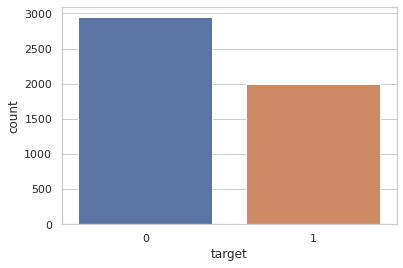

In [14]:
ax = sbn.countplot(x="target", data = df_upsampled)
#data is now balanced

In [15]:
#let's see if we can have any correlation in the given data
corr = df_upsampled.corr()
corr

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
max_return_days,1.000000,0.742808,-0.184187,0.005668,0.033876,-0.109242,-0.117210,-0.102478,-0.136074,-0.030657,-0.009450,-0.092546,-0.106748,-0.084682,0.321023
average_return_days,0.742808,1.000000,-0.268425,-0.020840,-0.011982,-0.116497,-0.123560,-0.060699,-0.110207,-0.057336,-0.026801,-0.097999,-0.104764,-0.067443,0.218041
customer_since_months,-0.184187,-0.268425,1.000000,0.109067,0.082020,0.352025,0.385006,-0.179157,0.364765,0.177067,0.007179,0.266823,0.276116,0.179954,-0.399626
total_revenue,0.005668,-0.020840,0.109067,1.000000,0.924625,0.635513,0.668343,-0.017679,0.064015,0.209133,0.069707,0.151159,0.163156,0.151968,-0.065165
average_revenue,0.033876,-0.011982,0.082020,0.924625,1.000000,0.599862,0.625118,-0.004530,0.054234,0.209707,0.071135,0.138902,0.149251,0.142953,-0.049694
avg_vas_count,-0.109242,-0.116497,0.352025,0.635513,0.599862,1.000000,0.964173,-0.104342,0.126525,0.383738,0.134472,0.333565,0.331509,0.212125,-0.217656
avg_used_vas_value,-0.117210,-0.123560,0.385006,0.668343,0.625118,0.964173,1.000000,-0.104703,0.154547,0.389888,0.130200,0.346837,0.347424,0.223221,-0.238742
business_type,-0.102478,-0.060699,-0.179157,-0.017679,-0.004530,-0.104342,-0.104703,1.000000,-0.090772,-0.067688,0.024829,-0.022615,-0.044390,0.000706,0.012457
avg_wallet_bonus,-0.136074,-0.110207,0.364765,0.064015,0.054234,0.126525,0.154547,-0.090772,1.000000,0.347604,0.112069,0.367790,0.403845,0.319352,-0.124220
avg_active_ads,-0.030657,-0.057336,0.177067,0.209133,0.209707,0.383738,0.389888,-0.067688,0.347604,1.000000,0.669429,0.585338,0.586253,0.393146,-0.057301


In [16]:
import matplotlib.pyplot as plt  #importing to render heat map

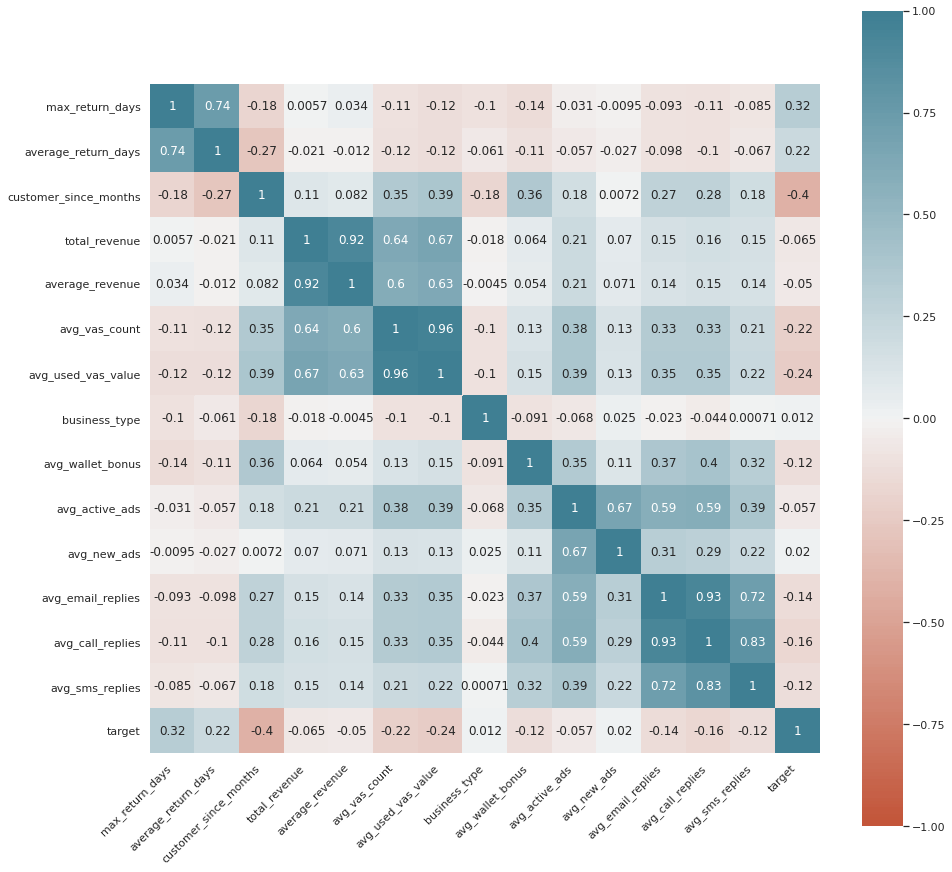

In [17]:
#representing the above data in a more comprehensive manner
plt.figure(figsize=(15,15))
ax = sbn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,annot = True,
    cmap=sbn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [18]:
#our target variable apperas to be considerable correlated with max_return_days and average_return_days

In [19]:
#Normalising dataset to ensure no certain outliers in a variable has distorts the prediction
from sklearn import preprocessing

In [20]:
x = df_upsampled.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled)

In [21]:
df1.columns
#preprocessing stripped our column names :(   Let's get them back
#so that we can feed raw data without any hassel to our upcoming models

RangeIndex(start=0, stop=15, step=1)

In [22]:
df1 = pd.DataFrame(data=df1.values, columns=df_upsampled.columns)
#using data from df1 and column names from df_upsampled, we keep our data intact
#and column names back as well
df1.sample(5)
#we got our names back :)

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
739,0.025496,0.001574,0.739130,0.0,0.0,0.011790,0.007102,0.0,0.049979,0.022146,0.003158,0.016343,0.016237,0.010511,0.0
3414,0.082153,0.013535,0.347826,0.0,0.0,0.015966,0.011914,0.0,0.032679,0.012683,0.010457,0.015209,0.011449,0.000000,1.0
3740,0.079320,0.050992,0.217391,0.0,0.0,0.009580,0.005957,0.0,0.000000,0.001676,0.000863,0.002340,0.000894,0.000000,1.0
2034,0.028329,0.002397,0.521739,0.0,0.0,0.091964,0.098287,0.0,0.060872,0.308026,0.039639,0.055501,0.037709,0.006832,0.0
998,0.101983,0.026062,0.391304,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.006758,0.000729,0.005709,0.003291,0.006832,0.0


In [23]:
#Let's split our data

In [24]:
X = df1.drop('target',axis = 1)

In [25]:
y = df1['target']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [28]:
testX = test.drop('target',axis = 1)

In [29]:
testy = test['target']

##Using XGB classifier
<a id='item12'></a>

In [30]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

In [53]:
xgb_classifier = xgb.XGBClassifier(max_depth=2, n_jobs=-1, learning_rate=0.2, n_estimators = 500)
xgb_classifier.fit(X_train,y_train)
pred_testset = xgb_classifier.predict(X_test)
accuracy_int_test = accuracy_score(y_test,pred_testset)    #Evaluating on our test data
pred_rawset = xgb_classifier.predict(testX)                      
accuracy_test = accuracy_score(testy, pred_rawset)          #Evaluating on our raw data
print('accuracy on test set = ',accuracy_int_test*100)
print('accuracy on external set set = ',accuracy_test*100)

accuracy on test set =  93.45189975747778
accuracy on external set set =  89.11070780399274


In [33]:
print(classification_report(y_test,pred_testset))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       738
         1.0       0.94      1.00      0.97       499

    accuracy                           0.97      1237
   macro avg       0.97      0.98      0.97      1237
weighted avg       0.97      0.97      0.97      1237



##Using RandomForest
<a id='item13'></a>

In [34]:
#importing RandomForest
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfr_classifier = RandomForestClassifier(n_estimators = 44 ,criterion = 'gini', random_state = 0) #Since the dataset was small, I used brute force to 
rfr_classifier.fit(X_train, y_train)                                                             #to find the best n_estimator
pred = rfr_classifier.predict(testX)

result = accuracy_score(testy, pred)          #Evaluating on our raw data

0.8938294010889292 0


In [37]:
pred2 = rfr_classifier.predict(X_test)        #Evaluating on our test data

print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       738
         1.0       0.95      1.00      0.97       499

    accuracy                           0.98      1237
   macro avg       0.97      0.98      0.98      1237
weighted avg       0.98      0.98      0.98      1237



##Training DNN
<a id='item14'></a>

In [38]:
#importing deep neural network
from keras.models import Sequential
from keras.layers import Dense

In [39]:
modelDeep = Sequential([Dense(32, activation='relu', input_shape=(14,)),
                    Dense(64, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(1, activation='sigmoid'),])

In [40]:
modelDeep.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
hist = modelDeep.fit(X_train, y_train,          batch_size=32, epochs=200,          validation_data=(testX,testy)) 
                                                                                    #using our raw data to see how accurate our modelactually is

Epoch 1/200
116/116 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5942 - val_loss: 3.9587 - val_accuracy: 0.5989
Epoch 2/200
116/116 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.5953 - val_loss: 2.5506 - val_accuracy: 0.6824
Epoch 3/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.5953 - val_loss: 1.5878 - val_accuracy: 0.7604
Epoch 4/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.5953 - val_loss: 1.0168 - val_accuracy: 0.8639
Epoch 5/200
116/116 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.5953 - val_loss: 0.9785 - val_accuracy: 0.9029
Epoch 6/200
116/116 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.5953 - val_loss: 1.0964 - val_accuracy: 0.9111
Epoch 7/200
116/116 [==============================] - 0s 1ms/step - loss: 0.6507 - accuracy: 0.5953 - val_loss: 1.2597 - val_accuracy: 0.9129

##Using SHAP to explain our model
<a id='item15'></a>

In [42]:
#! pip install shap

import shap


In [43]:
#Let's explain our random forest model using SHAP

In [44]:
explainer = shap.TreeExplainer(rfr_classifier)

In [45]:
instance = X_train.iloc[3124]   #picking a specific row to examine
shap_values = explainer.shap_values(instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], instance)

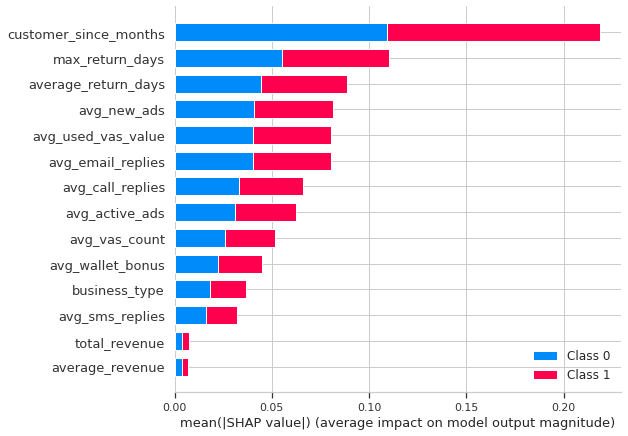

In [46]:
shap.summary_plot(explainer.shap_values(X_test), X_test)

On interpretaing our SHAP graph,
It is clear that 'average_return_days' has a dominant role in increasing our prediction.
On the other hand, 'customer_since_months' has significant role in 
decresing our prediction

In [47]:
#using kernel explainer on our Deep Learning model

In [49]:
k_explainer = shap.KernelExplainer(modelDeep.predict_proba, testX)
k_shap_values = k_explainer.shap_values(testX.iloc[[32]])
shap.initjs()
shap.force_plot(k_explainer.expected_value[0], k_shap_values[0], testX.iloc[[32]])

Instructions for updating:
Please use `model.predict()` instead.


Using 1102 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In our deep learning model, 'customer_since_moths' plays an important role
in deciding the outcome.
Similarly 'avg_used_vas_value' and 'avg_wallet_bonus' made signifacant contribution in decreasing the outcome

##Conclusion
<a id='item16'></a>

        |Model | Test_Score   | Raw_Score |
        |------|--------------|-----------| 
        | RFR  |      98%     |    89.3%  |
        |------|--------------|-----------| 
        | XGB  |    93.4%     |   89.11%  |
        |------|--------------|-----------| 
        | DNN  |       NA     |   87.6%   |

Random Forest Classifier reigns superior over all of the models we used,
In our pre processed data all of the models perfrmed exceptionally well.
But in our Raw data (that we exctracted from the dataset ), All of the model 
showed significant decrease, This result should be considered the model's 
practical accuracy .